#### DSC550-T301 
##### Chitramoy Mukherjee
##### Week-4
##### Date: 12/20/2023

In [41]:
import warnings 
warnings.filterwarnings('ignore')

# Required python basic libraries 

import numpy as np
import pandas as pd
import textblob           
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

### Reading the auto-mpg.csv file into DataFrame
auto_df = pd.read_csv("C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-550\Week-4\\auto-mpg.csv")

# Display the first few rows of the DataFrame to ensure it's loaded properly
print(auto_df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [3]:
# Remove the 'car name' column
auto_df = auto_df.drop('car name', axis=1)

# Display the DataFrame after removing the 'car name' column
print("\nDataFrame after removing 'car name' column:")
print(auto_df.head())


DataFrame after removing 'car name' column:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


In [4]:
# Create dummy variables for the 'origin' column
df = pd.get_dummies(auto_df, columns=['origin'], drop_first=True)

# Display the modified DataFrame
print("\nDataFrame after preprocessing:")
print(auto_df.head())


DataFrame after preprocessing:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  


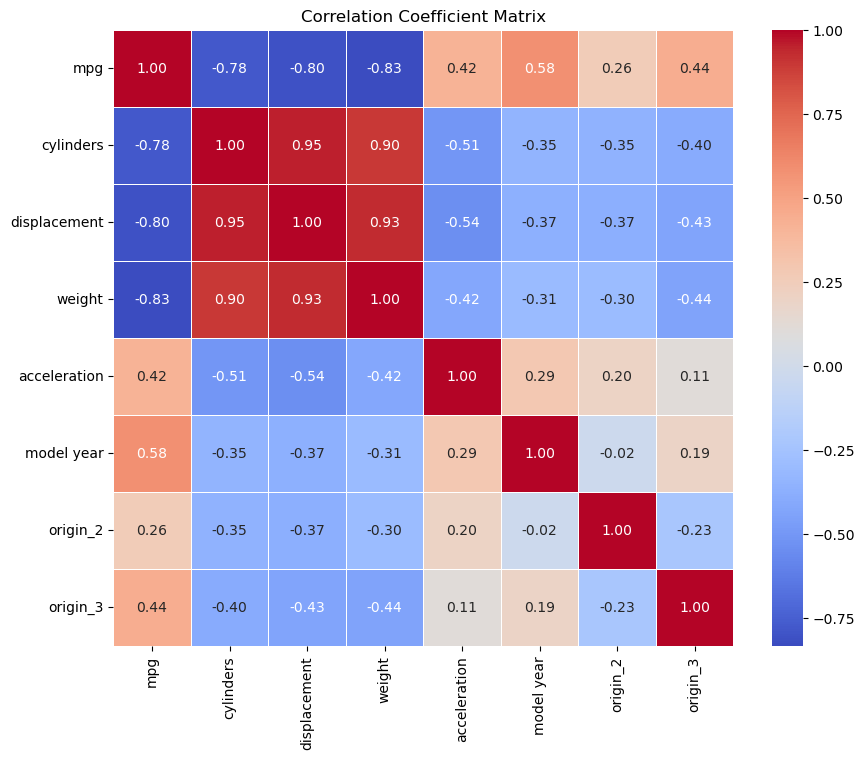

Features highly correlated with 'mpg':
 mpg             1.000000
model year      0.579267
origin_3        0.442174
acceleration    0.420289
origin_2        0.259022
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [5]:
# Create a correlation coefficient matrix
correlation_matrix = df.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Coefficient Matrix")
plt.show()

# Display features highly correlated with 'mpg'
mpg_correlations = correlation_matrix['mpg'].sort_values(ascending=False)
print("Features highly correlated with 'mpg':\n", mpg_correlations)

In [44]:
pip install flair


     -------------------------------------- 387.2/387.2 kB 4.0 MB/s eta 0:00:00
     --------------------------------------- 24.0/24.0 MB 10.7 MB/s eta 0:00:00
     -------------------------------------- 981.5/981.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 53.4/53.4 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 201.2/201.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 311.7/311.7 kB 9.7 MB/s eta 0:00:00
     -------------------------------------- 192.2/192.2 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 8.3/8.3

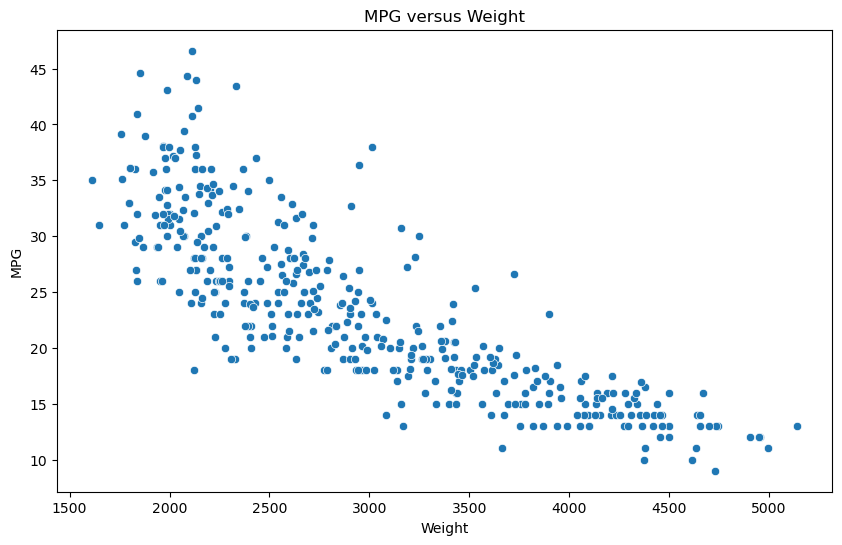

Analyzing the relationship between MPG and Weight:
The scatterplot shows a negative correlation between MPG and Weight.
As weight increases, MPG tends to decrease.
This is consistent with the negative correlation coefficient observed in the correlation matrix.


In [12]:
# Plot mpg versus weight
# Plot mpg versus weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('MPG versus Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

# Explain the relationship between MPG and Weight
print("Analyzing the relationship between MPG and Weight:")
print("The scatterplot shows a negative correlation between MPG and Weight.")
print("As weight increases, MPG tends to decrease.")
print("This is consistent with the negative correlation coefficient observed in the correlation matrix.")

In [32]:
# Randomly split the data into 80% training data and 20% test data
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (318, 8) (318,)
Test set shape: (80, 8) (80,)


In [38]:
# Train an ordinary linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = linear_reg_model.predict(X_train)

# Evaluate the model using training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Print the results of R^2, RMSE and MAE
print("Results on the Training Set:")
print(f'R^2: {r2_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAE: {mae_train:.4f}')

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Interpret the results
print(f"R2 (Training): {r2_train}")
print(f"RMSE (Training): {rmse_train}")
print(f"MAE (Training): {mae_train}")

# R-squared is a measure of how well the model explains the variability of the target variable.1 indicates that the model perfectly predicts the target variable.
# R^2 of 0.8188 means that approximately 81.88% of the variability in the target variable (MPG) is explained by the model.
# A lower RMSE indicates better model performance. In this case, an RMSE of 3.3703 means that, on average, the model's predictions deviate from the actual values by approximately 3.37 MPG.
# Lower MAE indicates better model performance. In this case, an MAE of 2.6055 means that, on average, the model's predictions deviate from the actual values by approximately 2.61 MPG


Results on the Training Set:
R^2: 0.8188
RMSE: 3.3703
MAE: 2.6055
R2 (Training): 0.8188288951042786
RMSE (Training): 3.3702735639389054
MAE (Training): 2.6054846937710354


In [40]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred_rf = rf_model.predict(X_train)

# Calculate R2, RMSE, and MAE on both training and test sets for Random Forest model
r2_train_rf = r2_score(y_train, y_train_pred_rf)

rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)

mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

# Interpret the results for Random Forest model
print("Random Forest Regression Results:")
print(f"R2 (Training): {r2_train_rf}")
print(f"RMSE (Training): {rmse_train_rf}")
print(f"MAE (Training): {mae_train_rf}")

# R-squared is a measure of how well the model explains the variability of the target variable.1 indicates that the model perfectly predicts the target variable.
# R^2 of 0.9810 means that approximately 98.10% of the variability in the target variable (MPG) is explained by the model.
# A lower RMSE indicates better model performance. In this case, an RMSE of 1.0908 means that, on average, the model's predictions deviate from the actual values by approximately 1.09 MPG.
# Lower MAE indicates better model performance. In this case, an MAE of 0.7477 means that, on average, the model's predictions deviate from the actual values by approximately 0.74 MPG



Random Forest Regression Results:
R2 (Training): 0.9810189898945959
RMSE (Training): 1.0908884599607205
MAE (Training): 0.7477955974842765
